In [42]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

## Generate Random Data Points

In [43]:
# Generate a quadratic function with some noise
np.random.seed(0)
a, b, c = 1, 2, 3  # Coefficients of the quadratic function


In [44]:
x = np.linspace(0, 10, 100)  # X values from 0 to 10
x

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

In [45]:
y_true = a * x**2 + b * x + c  # True quadratic function
y_true

array([  3.        ,   3.21222324,   3.44485257,   3.69788797,
         3.97132946,   4.26517702,   4.57943067,   4.9140904 ,
         5.26915621,   5.6446281 ,   6.04050607,   6.45679012,
         6.89348026,   7.35057647,   7.82807877,   8.32598714,
         8.8443016 ,   9.38302214,   9.94214876,  10.52168146,
        11.12162024,  11.74196511,  12.38271605,  13.04387307,
        13.72543618,  14.42740537,  15.14978063,  15.89256198,
        16.65574941,  17.43934292,  18.24334252,  19.06774819,
        19.91255994,  20.77777778,  21.66340169,  22.56943169,
        23.49586777,  24.44270993,  25.40995817,  26.39761249,
        27.40567289,  28.43413937,  29.48301194,  30.55229058,
        31.64197531,  32.75206612,  33.882563  ,  35.03346597,
        36.20477502,  37.39649015,  38.60861137,  39.84113866,
        41.09407203,  42.36741149,  43.66115702,  44.97530864,
        46.30986634,  47.66483012,  49.04019998,  50.43597592,
        51.85215794,  53.28874605,  54.74574023,  56.22

In [46]:
noise = np.random.normal(0, 5, 100)  # Add some noise
noise

array([  8.82026173,   2.00078604,   4.89368992,  11.204466  ,
         9.33778995,  -4.8863894 ,   4.75044209,  -0.75678604,
        -0.51609426,   2.05299251,   0.72021786,   7.27136753,
         3.80518863,   0.60837508,   2.21931616,   1.66837164,
         7.47039537,  -1.02579132,   1.56533851,  -4.2704787 ,
       -12.76494908,   3.26809298,   4.32218099,  -3.7108251 ,
        11.34877312,  -7.27182837,   0.22879259,  -0.93591925,
         7.66389607,   7.34679385,   0.77473713,   1.8908126 ,
        -4.43892874,  -9.90398234,  -1.73956075,   0.78174485,
         6.1514534 ,   6.01189924,  -1.93663409,  -1.51151375,
        -5.24276483,  -7.10008969,  -8.53135095,   9.75387698,
        -2.54826091,  -2.19037151,  -6.2639768 ,   3.88745178,
        -8.06948924,  -1.0637014 ,  -4.47733281,   1.93451249,
        -2.55402569,  -5.90316092,  -0.14091114,   2.14165935,
         0.33258611,   1.51235949,  -3.17161047,  -1.81370583,
        -3.36230224,  -1.79776581,  -4.06573141,  -8.63

In [47]:
y = y_true + noise
y

array([ 11.82026173,   5.21300928,   8.33854249,  14.90235397,
        13.30911941,  -0.62121238,   9.32987276,   4.15730436,
         4.75306195,   7.69762061,   6.76072393,  13.72815766,
        10.69866888,   7.95895155,  10.04739493,   9.99435878,
        16.31469697,   8.35723082,  11.50748727,   6.25120276,
        -1.64332884,  15.01005808,  16.70489704,   9.33304797,
        25.0742093 ,   7.15557699,  15.37857322,  14.95664273,
        24.31964549,  24.78613677,  19.01807964,  20.95856079,
        15.4736312 ,  10.87379544,  19.92384095,  23.35117654,
        29.64732117,  30.45460917,  23.47332408,  24.88609874,
        22.16290807,  21.33404969,  20.95166098,  40.30616756,
        29.0937144 ,  30.56169461,  27.6185862 ,  38.92091775,
        28.13528579,  36.33278875,  34.13127856,  41.77565115,
        38.54004635,  36.46425057,  43.52024588,  47.11696799,
        46.64245245,  49.17718961,  45.86858951,  48.62227009,
        48.4898557 ,  51.49098024,  50.68000882,  47.59

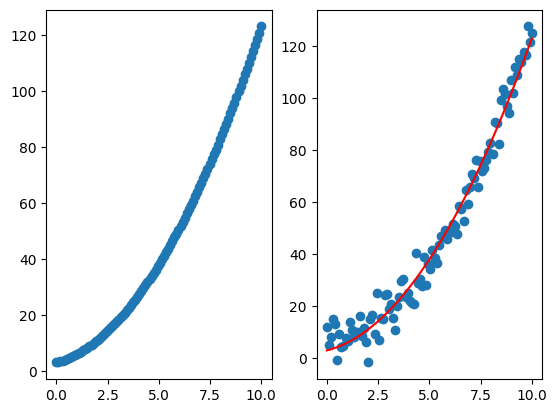

In [48]:
# Y vs X Graph without noise
fig,ax = plt.subplots(1,2)

ax[0].scatter(x, y_true)
ax[1].scatter(x, y)
ax[1].plot(x, y_true , color="red")

In [49]:
# 80/20 split indices
sample_indices = np.random.choice(100, 80, replace=False)
sample_indices

array([19,  6, 45, 57, 22, 25, 48, 30, 59, 73, 15, 12, 49, 95, 14, 50, 89,
       42, 52, 36,  4, 78, 74, 47, 68, 17, 83,  8, 16, 88, 75, 80, 72,  0,
        5, 60, 81, 84, 34, 33, 21, 93,  7, 66, 94, 98, 96, 63, 82, 26, 62,
       58, 65, 90, 55,  9, 39, 77, 86, 29, 64, 20, 46, 51, 53, 23, 27,  2,
       28, 37, 87, 10, 97, 99, 43, 69, 61, 35, 76,  3])

In [50]:
X_train = x[sample_indices]
Y_train = y[sample_indices]


test_sample_indices = [i for i in range(100) if i not in sample_indices]
X_test = x[test_sample_indices]
Y_test = y[test_sample_indices]

In [51]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((80,), (80,), (20,), (20,))

## Polynomial Regression

Try out this regression for various degree eqn

----Accuracies---
[{'degree': 1, 'error': 101.09742645193307, 'score': 0.9149643756836985}, {'degree': 2, 'error': 19.39993587824216, 'score': 0.9836822190534505}, {'degree': 3, 'error': 19.50822489783476, 'score': 0.9835911343966909}, {'degree': 4, 'error': 22.139747813139685, 'score': 0.9813776933442423}]


----Best Case----
Degree: 2
Error: 19.39993587824216


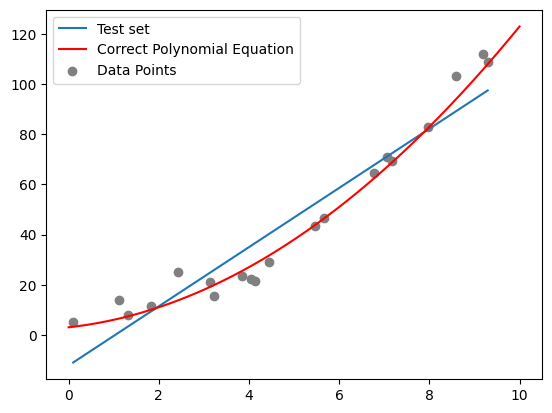

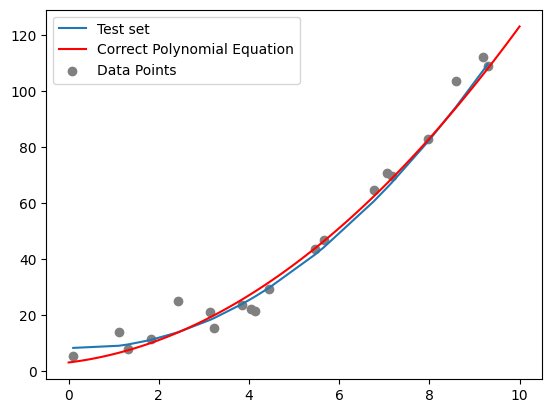

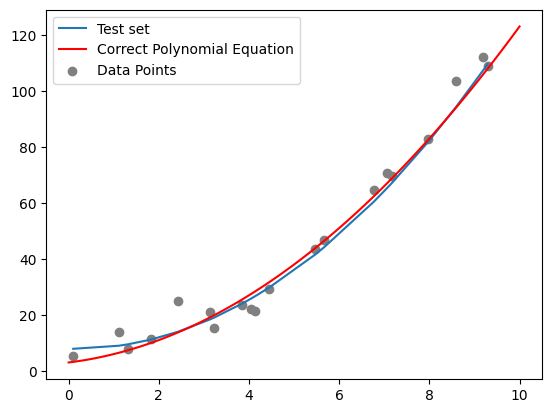

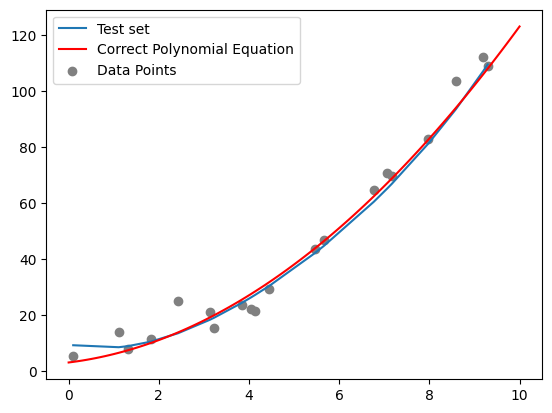

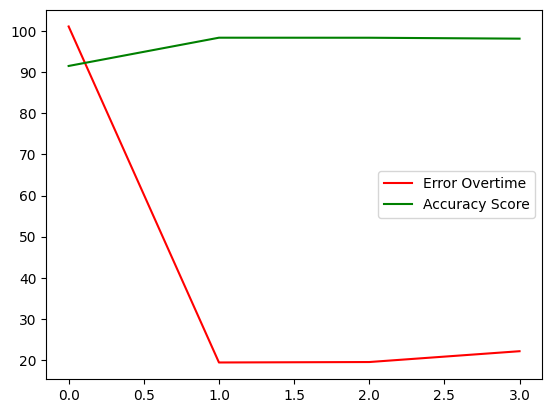

In [80]:
from sklearn.metrics import mean_squared_error
import pickle

accuracies = []
errors = []
scores = []

def polynomialRegression(degree=2, x_train=[], y_train=[], x_test=[], y_test=[], i = 0, graph=True) :



  poly_features = PolynomialFeatures(degree=degree)
  X_poly = poly_features.fit_transform(x_train.reshape(-1, 1))
  model = LinearRegression()
  model.fit(X_poly, y_train)

    # save the model to disk
  filename = 'model-' + str(degree) + '.sav'
  pickle.dump(model, open('models/' + filename, 'wb'))
  # Predict the next 2-3 points
  X_predict_poly = poly_features.transform(X_test.reshape(-1, 1))
  y_predict = model.predict(X_predict_poly)

  #error/accuracy score
  error = mean_squared_error(Y_test, y_predict)
  X_poly = poly_features.fit_transform(x_test.reshape(-1,1))
  score = model.score(X_poly, y_test)

  errors.append(error)
  scores.append(score)
  result = {
      "degree" : degree,
      "error" : error,
      "score" : score
  }

  accuracies.append(result)
  if(graph):

    fig = plt.figure()
    plt.plot(x_test, y_predict, label="Test set")
    plt.plot(x, y_true, label="Correct Polynomial Equation", color="red")
    plt.scatter(X_test, Y_test, label="Data Points", color="gray")
    plt.legend()

  return X_predict_poly, y_predict

# run the method for 10 degrees

for i in range(1, 5) :
  polynomialRegression(i, X_train, Y_train, X_test, Y_test, i)



index = -1
max = 999999
for i in range(len(accuracies)) :
  if(accuracies[i]["error"] < max ) :
    index = i
    max=accuracies[i]["error"]


print("----Accuracies---")
print(accuracies)
print("\n\n----Best Case----")
print(f"Degree: {accuracies[index]['degree']}")
print(f"Error: {accuracies[index]['error']}")

plt.figure()
plt.plot(errors, label="Error Overtime", color="red")
plt.plot(np.array(scores) * 100, label="Accuracy Score", color="green")
plt.legend()

## Prediction Fucntion Using the Saved Model

In [63]:
def predict(degree, x_val) :
  loaded_model = pickle.load(open('model-' + str(degree) + '.sav', 'rb'))

  poly_features = PolynomialFeatures(degree=degree)
  X_poly = 0
  if(type(x_val) == int):
    X_poly = poly_features.fit_transform(np.array(x_val).reshape(-1, 1))
  else:
    X_poly = poly_features.fit_transform(x_val.reshape(-1, 1))

  return loaded_model.predict(X_poly)

predict(2, 0)

array([8.91067525])

## Animate Predicitons

In [ ]:
from matplotlib.animation import PillowWriter


def animate_graph(degree=2) :
  fig = plt.figure()
  plt.xlim(0,10)
  plt.ylim(0,200)
  l, = plt.plot([] , [])
  l2, = plt.plot([] , [] ,'m--')
  x_values = []
  y_values = []
  x,y = polynomialRegression(degree, X_train, Y_train, X_test, Y_test, 0, False)
  metadata = dict(title = "Polynomial Regression")
  writer = PillowWriter(fps=15 , metadata=metadata)
  with writer.saving(fig, "Polynomial Regression.gif", 100 ) :
    for i in range(y.shape[0]) :
      x_values.append(X_test[i])
      y_values.append(y[i])

      l.set_data(x_values, y_values)

      writer.grab_frame()

    print(x_values)
    print(y_values)
  #for i in range(len(X_test)) :
    #x_values.append(X_test[i])
    #y_values.append(y[i])

    #plt.scatter(x_values , y_values)
    #plt.pause(1)

animate_graph()